<a href="https://colab.research.google.com/github/mirpouya/Introduction-to-PyTorch/blob/main/pytorch_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

**<h2> Tensors </h2>**

In [ ]:
# making an empty tensor

x = torch.empty(3)
x

# values are not initialized

tensor([-7.3062e+27,  4.5811e-41,  9.6350e-35])

In [ ]:
x = torch.empty(2,3)

In [ ]:
x

tensor([[9.4303e-35, 0.0000e+00, 8.1261e-35],
        [0.0000e+00, 9.3736e-35, 0.0000e+00]])

In [ ]:
# tensors with random values

x = torch.rand(2,4)
x

tensor([[0.0846, 0.1459, 0.3368, 0.5671],
        [0.0363, 0.0838, 0.1082, 0.2956]])

In [ ]:
x = torch.ones(2,3,4)
x

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [ ]:
# shape of a tensor

x.size()

torch.Size([2, 3, 4])

In [ ]:
x1 = torch.rand(2,3)
print(f"x1 : {x1}")

x2 = torch.ones(2,3)
print(f"x2 : {x2}")

# adding x2 to x1

x1.add_(x2)
print(f"x1 : {x1}")

x1 : tensor([[0.7914, 0.1670, 0.4790],
        [0.7533, 0.5444, 0.4997]])
x2 : tensor([[1., 1., 1.],
        [1., 1., 1.]])
x1 : tensor([[1.7914, 1.1670, 1.4790],
        [1.7533, 1.5444, 1.4997]])


In [ ]:
# in pyorch every function that has underline "_" at the end, does an inplace opperation
# these three are the same

x = torch.ones(3)
y = torch.rand(3)
z = torch.sub(x,y)


print(f"x - y : {x - y}\n")
print(f"z : {z}\n")

x.sub_(y)
print(f"x.sub_(y) : {x}\n")

x - y : tensor([0.1611, 0.8276, 0.4206])

z : tensor([0.1611, 0.8276, 0.4206])

x.sub_(y) : tensor([0.1611, 0.8276, 0.4206])



In [ ]:
# reshaping tensor

x = torch.rand(3,4)

print(f"x is : {x}\n")
print(f"shape of x is : {x.size()}\n")

x2 = x.view(2,6)

print(f"x2 is : {x2}\n")
print(f"shape of x2 is : {x2.size()}\n")

x is : tensor([[0.4677, 0.6345, 0.9472, 0.8734],
        [0.7569, 0.1102, 0.5118, 0.5371],
        [0.1469, 0.4628, 0.4660, 0.6707]])

shape of x is : torch.Size([3, 4])

x2 is : tensor([[0.4677, 0.6345, 0.9472, 0.8734, 0.7569, 0.1102],
        [0.5118, 0.5371, 0.1469, 0.4628, 0.4660, 0.6707]])

shape of x2 is : torch.Size([2, 6])



In [ ]:
# consider we want to reshape a tensor, and we want to pass one of the new dimensions
# so pytorch calculate other dimensions with respect to what we passed

x = torch.rand(4,6)
print(f"x is : {x}\n")
print(f"shape of x is : {x.size()}\n")

x2 = x.view(-1,2,4)
print(f"x is : {x2}\n")
print(f"shape of x2 is : {x2.size()}\n")

x is : tensor([[0.7259, 0.7557, 0.3750, 0.9357, 0.3231, 0.3574],
        [0.3264, 0.3082, 0.2572, 0.6789, 0.8526, 0.7113],
        [0.2149, 0.1412, 0.2688, 0.7348, 0.6197, 0.5672],
        [0.3031, 0.4368, 0.5233, 0.1664, 0.7465, 0.2701]])

shape of x is : torch.Size([4, 6])

x is : tensor([[[0.7259, 0.7557, 0.3750, 0.9357],
         [0.3231, 0.3574, 0.3264, 0.3082]],

        [[0.2572, 0.6789, 0.8526, 0.7113],
         [0.2149, 0.1412, 0.2688, 0.7348]],

        [[0.6197, 0.5672, 0.3031, 0.4368],
         [0.5233, 0.1664, 0.7465, 0.2701]]])

shape of x2 is : torch.Size([3, 2, 4])



In [ ]:
# numpy

import numpy as np

In [ ]:
# sometimes you need to change numpy arrays to tensors

np_arr = np.random.randn(2,4)
print(f" np_arr : {np_arr}\n type: {type(np_arr)}\n")

tensor_arr = torch.from_numpy(np_arr)
print(f" tensor_arr : {tensor_arr}\n type: {type(tensor_arr)}")

 np_arr : [[ 2.4345086   1.02461036 -1.9507967   0.95667447]
 [-0.05011382  0.76821913 -0.66882421 -1.16434976]]
 type: <class 'numpy.ndarray'>

 tensor_arr : tensor([[ 2.4345,  1.0246, -1.9508,  0.9567],
        [-0.0501,  0.7682, -0.6688, -1.1643]], dtype=torch.float64)
 type: <class 'torch.Tensor'>


In [ ]:
# most of the time we train our model on GPU 
# to check if the option of training the model is available we can

if torch.cuda.is_available():
  # specify cuda device
  device = torch.device("cuda")

  # for creating a tensor on the GPU
  x = torch.ones((2,4), device=device)

  # or first create it and then move it to device
  y = torch.ones(2,4)
  y = y.to(device)

  # if any operation needs x and y it will be fulfilled on the device (GPU)
  z = x+y

  # remember, numpy can only handle CPU tensors 

**<h2> Autograd </h2>**

It is used to calculate gradients

In [ ]:
x = torch.randn(3, requires_grad=True)
x

tensor([ 0.5098,  0.8704, -0.8142], requires_grad=True)

In [ ]:
# we want to calculate gradients of a function with respect to x
# therefore we must set the argument "requires_grad" to True
print(f"x : {x}\n")

y = 2*x + 3
print(f"y : {y}\n")

z = 2*(y**2)
print(f"z : {z}\n")

# z = z.mean()
#print(f"z.mean() : {z}\n")

x : tensor([ 0.5098,  0.8704, -0.8142], requires_grad=True)

y : tensor([4.0196, 4.7408, 1.3716], grad_fn=<AddBackward0>)

z : tensor([32.3147, 44.9497,  3.7625], grad_fn=<MulBackward0>)



In [ ]:
z.backward(x)  # dz/dx since we specified requires_grad=True only in x

# then x has .grad attributes which the gradients with respect to x is stored

print(f"gradients with respect to x : {x.grad}")

gradients with respect to x : tensor([16.3939, 33.0102, -8.9340])


In [ ]:
# each time gradient values get accumulated in x.grad
# so be careful about this

# a dummy example
weights = torch.ones(4, requires_grad=True)

# training loop
for epoch in range(1):
  model_output = (weights*3).sum()

  # calculate gradients
  model_output.backward()

  print(f"weights.grad : {weights.grad}\n")

weights.grad : tensor([3., 3., 3., 3.])



In [ ]:
# a dummy example , continue
weights = torch.ones(4, requires_grad=True)

# training loop
for epoch in range(2):
  model_output = (weights*3).sum()

  # calculate gradients
  model_output.backward()

  print(f"weights.grad : {weights.grad}\n")

weights.grad : tensor([3., 3., 3., 3.])

weights.grad : tensor([6., 6., 6., 6.])



In [ ]:
# therefore we must zero gradients each time

# a dummy example , continue
weights = torch.ones(4, requires_grad=True)

# training loop
for epoch in range(3):
  model_output = (weights*3).sum()

  # calculate gradients
  model_output.backward()

  print(f"weights.grad : {weights.grad}\n")

  weights.grad.zero_()

weights.grad : tensor([3., 3., 3., 3.])

weights.grad : tensor([3., 3., 3., 3.])

weights.grad : tensor([3., 3., 3., 3.])



In [2]:
# a quick computer vision project

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [5]:
# for this project I use FashionMNIST

# download Training data
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
)

# download test data

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
)

Using downloaded and verified file: data/FashionMNIST/raw/train-images-idx3-ubyte.gz
Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw

Using downloaded and verified file: data/FashionMNIST/raw/train-labels-idx1-ubyte.gz
Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Using downloaded and verified file: data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw

Using downloaded and verified file: data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [7]:
# now we pass the downloaded dataset to DataLoader()
# this enables us to batch, sample, shuffle, ...

batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [8]:
# size of train split

for X, y in train_dataloader:
  print(f"Shape of X_trian [N, C, H, W]: {X.shape}")
  print(f"Shape of y_train: {y.shape} {y.dtype}")
  break

Shape of X_trian [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y_train: torch.Size([64]) torch.int64


In [9]:
# size of test split

for X, y in test_dataloader:
  print(f"Shape of X_test [N, C, H, W]: {X.shape}")
  print(f"Shape of y_test: {y.shape} {y.dtype}")
  break

Shape of X_test [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y_test: torch.Size([64]) torch.int64


**<h2> Deeper Look in Datasets and DataLoader </h2>**

we ideally want our dataset code to be decoupled from our model training code for better readability and modularity

In [14]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

**<h2> Visualizing the dataset </h2>**

In [15]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [16]:
import matplotlib.pyplot as plt

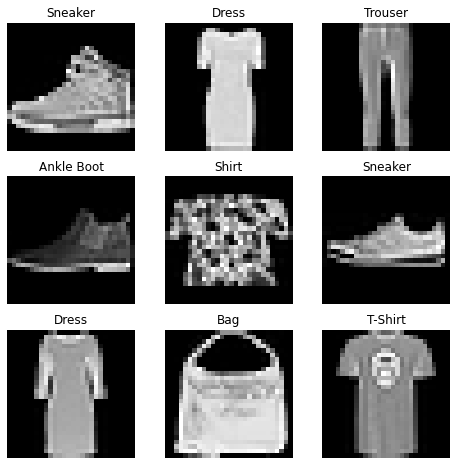

In [17]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

**<h2> Creating Model<h2>**

In [22]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device
